<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- K-Fold Cross Validation을 사용해 모델의 성능을 예측합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [17]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/diabetes.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [19]:
# 데이터 살펴보기
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**데이터설명**

피마 인디언 당뇨 데이터셋은 몇 명의 여성 피마 인디언의 진료 자료와 진단 후 5년 내 당뇨 발병 여부로 구성됨

- Pregnancies: 임신 횟수
- Glucose: 포도당 부하 검사 수치
- BloodPressure: 혈압(mm Hg)
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin: 혈청 인슐린(mu U/ml)
- BMI: 체질량지수(체중(kg)/키(m))^2
- DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- Age: 나이
- Outcome: 클래스 결정 값(0 또는 1)

**diabetes**

- 당뇨병(糖尿病, diabetes)은 높은 혈당 수치가 오랜 기간 지속되는 대사 질환이다. 
- 혈당이 높을 때의 증상으로는 소변이 잦아지고, 갈증과 배고픔이 심해진다. 
- 이를 치료하지 않으면 다른 합병증을 유발할 수 있다.
(출처: 위키백과)

In [20]:
# 기초통계정보 확인
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [21]:
# Target 확인
target = 'Outcome'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**2) 정규화**

In [22]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

**3) 학습용, 평가용 데이터 분리**

In [23]:
# 라이브러리 불러오기
from sklearn.model_selection import train_test_split

# 학습용, 평가용 데이터 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.성능 예측

- K분할 교차 검증 방법으로 모델 성능을 예측합니다.
- cross_val_score(model, x_train, y_train, cv=n) 형태로 사용합니다.
- cv 옵션에 k값(분할 개수, 기본값=5)을 지정합니다.
- cross_val_score 함수는 넘파이 배열 형태의 값을 반환합니다.
- cross_val_score 함수 반환 값의 평균을 해당 모델의 예측 성능으로 볼 수 있습니다.


## 4.1.Decision Tree

In [24]:
# 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# 선언하기 
model = DecisionTreeClassifier(random_state=2022)

# 검증하기
cv_score = cross_val_score(model, x_train, y_train, cv=10)

# 확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

# 기록
result = {}
result['Decision Tree'] = cv_score.mean()

[0.7037037  0.74074074 0.7037037  0.74074074 0.74074074 0.66666667
 0.74074074 0.69811321 0.75471698 0.75471698]
평균: 0.7244584206848357
표준편차: 0.027905358603661806


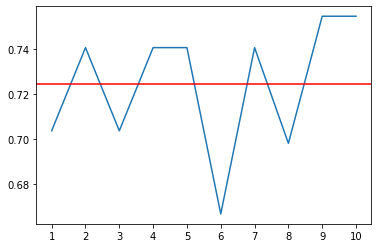

In [25]:
# 성능 정보 시각화
plt.plot(cv_score)
plt.axhline(cv_score.mean(), color='r')
plt.xticks(range(0, 10), range(1, 11))
plt.show()

## 4.2.KNN

In [26]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 선언하기 
model = KNeighborsClassifier()

# 검증하기
cv_score = cross_val_score(model, x_train, y_train, cv=10)

# 확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

# 기록
result['KNN'] = cv_score.mean()

[0.7962963  0.68518519 0.77777778 0.7037037  0.75925926 0.66666667
 0.75925926 0.64150943 0.69811321 0.73584906]
평균: 0.7223619846261355
표준편차: 0.04837278561230375


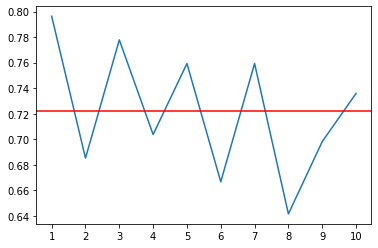

In [27]:
# 성능 정보 시각화
plt.plot(cv_score)
plt.axhline(cv_score.mean(), color='r')
plt.xticks(range(0, 10), range(1, 11))
plt.show()

## 4.3.Logistic Regression

- LogisticRegression 사용시 발생하는 Warning을 없애려면 충분한 max_iter를 지정합니다.

In [34]:
# 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# 선언하기
model = LogisticRegression()

# 검증하기
cv_score = cross_val_score(model, x_train, y_train, cv = 10)

# 확인
print(cv_score)
print(cv_score.mean())

# 기록
result['Logistic Regression'] = cv_score.mean()

[0.77777778 0.74074074 0.7962963  0.72222222 0.7962963  0.72222222
 0.72222222 0.79245283 0.79245283 0.79245283]
0.7655136268343816


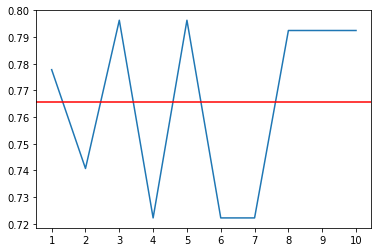

In [35]:
# 성능 정보 시각화
plt.plot(cv_score)
plt.axhline(cv_score.mean(), color='r')
plt.xticks(range(0, 10), range(1, 11))
plt.show()

## 4.4.SVM

In [42]:
# 불러오기
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold # 분류 문제에서 활용
from sklearn.model_selection import KFold # 회귀 문제에서 활용

# 선언하기 
model = SVC()

# 검증하기

# 분할 전 섞기: 분류 문제
# skf = StratifiedKFold(shuffle = True, n_splits = 10)
# cv_score = cross_val_score(model, x_train, y_train, cv = skf)

# 분할 전 섞기: 회귀 문제
# kf = KFold(shuffle = True, n_splits = 10)
# cv_score = cross_val_score(model, x_train, y_train, cv = kf)

cv_score = cross_val_score(model, x_train, y_train, cv = 10)

# 확인
print(cv_score)
print(cv_score.mean())

# 기록
result['SVM'] = cv_score.mean()

[0.7962963  0.74074074 0.7962963  0.74074074 0.72222222 0.7037037
 0.74074074 0.77358491 0.8490566  0.77358491]
0.7636967155835082


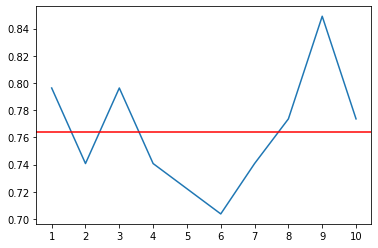

In [43]:
# 성능 정보 시각화
plt.plot(cv_score)
plt.axhline(cv_score.mean(), color='r')
plt.xticks(range(0, 10), range(1, 11))
plt.show()

# 5.성능 비교

- 위 과정에서 수집한 성능 정보를 시각화해 비교합니다.

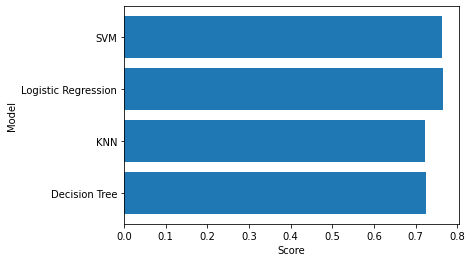

In [44]:
# 성능 비교
plt.barh(y=list(result), width=result.values())
plt.xlabel('Score')
plt.ylabel('Model')
plt.show()